In [1]:
import json
import pandas as pd

In [2]:
with open("twu.tennis-warehouse.com.json", "r") as f:  
    data = json.load(f)

In [3]:
log_data_entries = data['log']['entries']
racquet_data = []

for ele in log_data_entries:
    text_response = ele['response']['content']['text']
    if text_response[:10] == '{"pcode":"':
        racquet_data.append(json.loads(text_response))



In [4]:
df = pd.DataFrame(racquet_data)
df.columns

Index(['pcode', 'mfg', 'racquet', 'headsize', 'length', 'weight', 'balance',
       'swingweight', 'flex', 'acor', 'sweet', 'rccode', 'current',
       'twistweight', 'hittingweight', 'vibration', 'filter', 'distance',
       'spin', 'angle', 'shotspeed', 'swingspeed', 'plow', 'time'],
      dtype='object')

In [5]:
df = pd.DataFrame(racquet_data)
normal_length_racquets = df#[df['length']==27.0]
normal_length_racquets

,pcode,mfg,racquet,headsize,length,weight,balance,swingweight,flex,acor,...,hittingweight,vibration,filter,distance,spin,angle,shotspeed,swingspeed,plow,time
0,VS5,Volkl,V-Sense 5,100,27.00,276,33.5,281,70,0.255,...,114,164,21/2-effort,68.5,1596,3.6,64.5,51.4,37,0.89
1,U100UL,Wilson,Ultra 100UL,100,27.00,270,34.0,283,68,0.260,...,116,164,21/2-effort,68.5,1595,3.6,64.8,51.3,38,0.88
2,BULS1H,Wilson,Burn 100 ULS (2017),100,27.00,281,34.1,288,67,0.273,...,119,158,21/2-effort,68.2,1579,3.4,65.2,51.0,39,0.87
3,YEZLLG,Yonex,Ezone Lite,100,27.00,282,33.3,292,64,0.272,...,119,156,21/2-effort,68.1,1579,3.4,65.2,51.0,39,0.87
4,TPS270,Tecnifibre,T-Flash PS 270,100,27.00,285,34.1,293,69,0.271,...,119,160,21/2-effort,67.8,1570,3.5,64.9,50.7,39,0.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,YEZ98T,Yonex,EZONE 98 Tour,98,27.00,332,33.0,330,62,0.320,...,134,141,21/2-effort,66.2,1502,2.9,66.3,49.2,43,0.83
177,320HD7,Yonex,VCORE Pro 97D,97,27.00,340,32.0,330,61,0.322,...,135,125,21/2-effort,66.3,1505,2.9,66.5,49.2,43,0.83
178,MXG7,Head,MxG7,115,27.60,281,37.0,318,69,0.320,...,134,159,21/2-effort,66.8,1523,2.9,66.9,49.6,43,0.83
179,LM8,Head,Liquid Metal 8 OS,112,27.25,280,36.2,322,63,0.319,...,132,143,21/2-effort,66.8,1524,2.9,66.8,49.7,42,0.83


In [6]:
df.corr('pearson')

,headsize,length,weight,balance,swingweight,flex,acor,sweet,twistweight,hittingweight
headsize,1.000000,0.723444,-0.599071,0.746680,-0.181161,0.136140,0.070443,-0.044355,0.550930,0.082577
length,0.723444,1.000000,-0.383507,0.602687,0.123205,0.232750,0.223171,0.155876,0.338131,0.230702
weight,-0.599071,-0.383507,1.000000,-0.824583,0.686733,-0.244858,0.548516,0.599594,0.031961,0.560387
balance,0.746680,0.602687,-0.824583,1.000000,-0.296579,0.294544,-0.126449,-0.210071,0.244697,-0.132165
swingweight,-0.181161,0.123205,0.686733,-0.296579,1.000000,-0.150478,0.899281,0.915432,0.301626,0.913521
flex,0.136140,0.232750,-0.244858,0.294544,-0.150478,1.000000,-0.107462,-0.087778,0.008252,-0.099469
acor,0.070443,0.223171,0.548516,-0.126449,0.899281,-0.107462,1.000000,0.953856,0.649407,0.984295
sweet,-0.044355,0.155876,0.599594,-0.210071,0.915432,-0.087778,0.953856,1.000000,0.514561,0.938006
twistweight,0.550930,0.338131,0.031961,0.244697,0.301626,0.008252,0.649407,0.514561,1.000000,0.656235
hittingweight,0.082577,0.230702,0.560387,-0.132165,0.913521,-0.099469,0.984295,0.938006,0.656235,1.000000


In [7]:
df.corr('spearman')

,headsize,length,weight,balance,swingweight,flex,acor,sweet,twistweight,hittingweight
headsize,1.000000,0.544682,-0.579660,0.532460,-0.278286,0.207810,0.004165,-0.111226,0.460686,0.014621
length,0.544682,1.000000,-0.308605,0.453198,0.073067,0.220969,0.254447,0.167718,0.387580,0.256845
weight,-0.579660,-0.308605,1.000000,-0.804170,0.705995,-0.321070,0.528233,0.590749,0.042469,0.536721
balance,0.532460,0.453198,-0.804170,1.000000,-0.372815,0.369001,-0.174672,-0.265760,0.147703,-0.179271
swingweight,-0.278286,0.073067,0.705995,-0.372815,1.000000,-0.205371,0.872251,0.891383,0.315284,0.883693
flex,0.207810,0.220969,-0.321070,0.369001,-0.205371,1.000000,-0.109569,-0.115269,0.039960,-0.100604
acor,0.004165,0.254447,0.528233,-0.174672,0.872251,-0.109569,1.000000,0.948261,0.682405,0.984932
sweet,-0.111226,0.167718,0.590749,-0.265760,0.891383,-0.115269,0.948261,1.000000,0.556640,0.935083
twistweight,0.460686,0.387580,0.042469,0.147703,0.315284,0.039960,0.682405,0.556640,1.000000,0.685840
hittingweight,0.014621,0.256845,0.536721,-0.179271,0.883693,-0.100604,0.984932,0.935083,0.685840,1.000000


In [8]:
X = normal_length_racquets[['length','flex','weight', 'balance']]
y = normal_length_racquets['swingweight']

# X_train_mean = X.mean()
# X_train_sd = X.std()

# y_train_mean = y.mean()
# y_train_sd = y.std()

# X = (X - X.mean())/X.std()
# y = (y - y.mean())/y.std()

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3).fit(X)
print(pca.explained_variance_ratio_)



[0.96773561 0.03113927 0.00106929]


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


seaborn_data = pd.concat([X,y], axis=1)

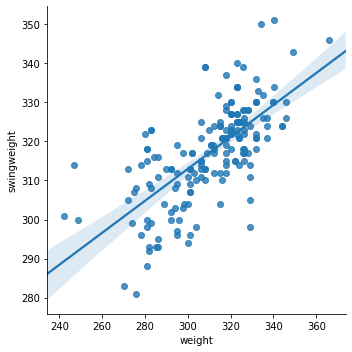

In [11]:
sns.lmplot(x="weight", 
           y="swingweight", 
           data=seaborn_data, x_jitter=.05);

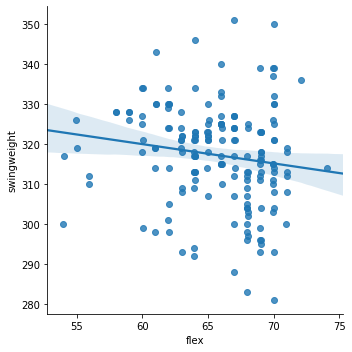

In [12]:
sns.lmplot(x="flex", y="swingweight", data=seaborn_data, x_jitter=.05);

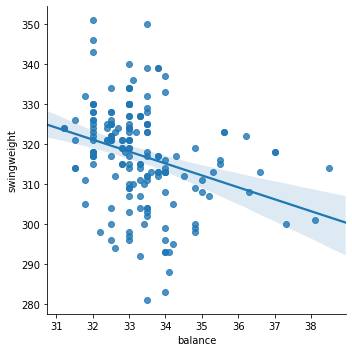

In [13]:
sns.lmplot(x="balance", y="swingweight", data=seaborn_data);

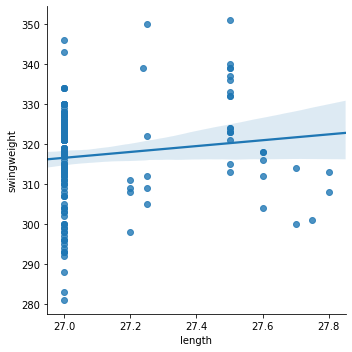

In [14]:
sns.lmplot(x="length", y="swingweight", data=seaborn_data);

In [15]:
from sklearn import metrics
import numpy as np

def calculate_metrics(y_true, y_pred):
    mae = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)
    med_ae = metrics.median_absolute_error(y_true, y_pred)
    mape = metrics.mean_absolute_percentage_error(y_true, y_pred)
    
    print("mean_absolute_error", mae)
    print("mean_squared_error", mse)
    print("RMSE", np.sqrt(mse))
    print("median_absolute_error", med_ae)
    print("mean_absolute_percentage_error", mape)
    

def evaluate_model(model):
    model = model.fit(X_train, y_train)
    print("train_score", model.score(X_train, y_train))
    print("test_score", model.score(X_test, y_test))
    y_pred = model.predict(X_test)
    calculate_metrics(y_test, y_pred)
    plt.hist(y_test-y_pred, bins=70)
    return model


def predict(model, flex, weight, balance, length):
    model = model.fit(X_train,y_train)
    sample = np.array([[length, flex, weight, balance]])
    return model.predict(sample) 

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_score 0.7664608021453823
test_score 0.5808288118752372
mean_absolute_error 4.642975866432245
mean_squared_error 48.65508898477251
RMSE 6.975319991568309
median_absolute_error 2.672829276663151
mean_absolute_percentage_error 0.01470078060922299


LinearRegression()

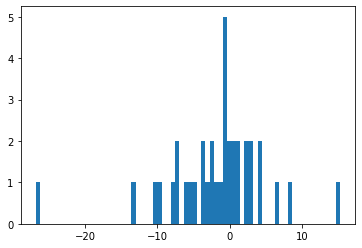

In [17]:
from sklearn.linear_model import LinearRegression,BayesianRidge
evaluate_model(LinearRegression())    


In [18]:
#predict(LinearRegression(), 68, 357, 31.4)

train_score 0.7656638417668057
test_score 0.5801063785889211
mean_absolute_error 4.61375401455635
mean_squared_error 48.738945072278234
RMSE 6.981328317181354
median_absolute_error 2.6429101857960973
mean_absolute_percentage_error 0.01460718890794064


array([12.72407368, -0.2968122 ,  0.80230372,  6.92254343])

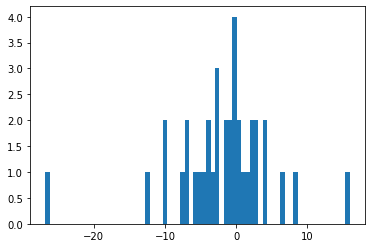

In [19]:
evaluate_model(BayesianRidge()).coef_    


In [20]:
predict(BayesianRidge(), 68, 357, 31.4,27)

array([339.94239752])

train_score 0.7664389645536746
test_score 0.5808306913864596
mean_absolute_error 4.638095596667355
mean_squared_error 48.65487082143408
RMSE 6.975304353319221
median_absolute_error 2.6675439470343463
mean_absolute_percentage_error 0.014685120845601102


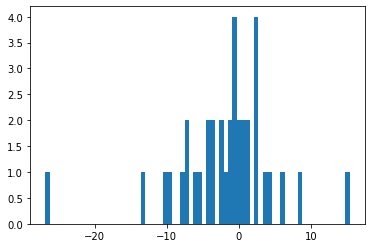

In [21]:
from sklearn.linear_model import RidgeCV

ridge = evaluate_model(RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]))    


In [22]:
ridge.coef_

array([14.56803487, -0.30264194,  0.79822587,  6.69519732])

In [23]:
predict(RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]), 68, 357, 31.4,27)

array([339.98896344])

train_score 0.7164185727076691
test_score 0.5516171477743119
mean_absolute_error 4.9629357551387505
mean_squared_error 52.04581849216595
RMSE 7.214278792240147
median_absolute_error 3.2114978165165553
mean_absolute_percentage_error 0.01578331042452701


ElasticNetCV(cv=5, random_state=0)

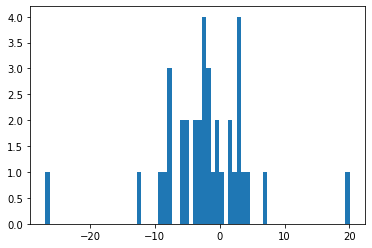

In [24]:
from sklearn.linear_model import ElasticNetCV
evaluate_model(ElasticNetCV(cv=5, random_state=0))    


In [25]:
predict(ElasticNetCV(cv=5, random_state=0), 68, 357, 31.4,27)

array([339.0051593])

train_score 0.5472907561006923
test_score 0.17711812171740016
mean_absolute_error 7.85167104911476
mean_squared_error 95.51560829099694
RMSE 9.773208699858861
median_absolute_error 6.847289393793687
mean_absolute_percentage_error 0.02515264354340757


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR()

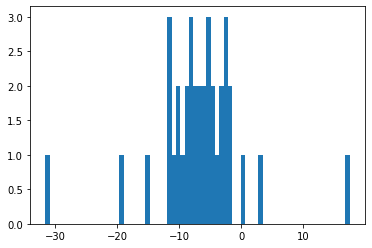

In [26]:
from sklearn import svm
evaluate_model(svm.LinearSVR())    


train_score -3.9186518255156804
test_score -6.966772166949599
mean_absolute_error 28.963141211454573
mean_squared_error 924.7391511769853
RMSE 30.409524020888345
median_absolute_error 28.26993639168836
mean_absolute_percentage_error 0.09198129947195102


SGDRegressor(loss='huber')

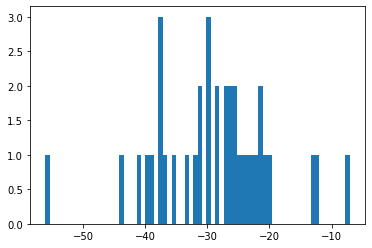

In [27]:
from sklearn.linear_model import SGDRegressor
evaluate_model(SGDRegressor(loss="huber"))    


train_score 0.9967354078855009
test_score -178.25928475728372
mean_absolute_error 103.03729665242659
mean_squared_error 20807.433092506155
RMSE 144.24781832841063
median_absolute_error 97.06560944956667
mean_absolute_percentage_error 0.32905671221628496


GaussianProcessRegressor()

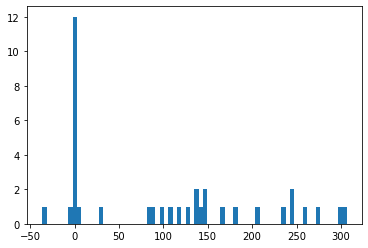

In [28]:
from sklearn.gaussian_process import GaussianProcessRegressor
evaluate_model(GaussianProcessRegressor())    


train_score 0.9967354078855101
test_score 0.6458472304381206
mean_absolute_error 3.7567567567567566
mean_squared_error 41.108108108108105
RMSE 6.411560504908934
median_absolute_error 2.0
mean_absolute_percentage_error 0.012167946260849586


DecisionTreeRegressor()

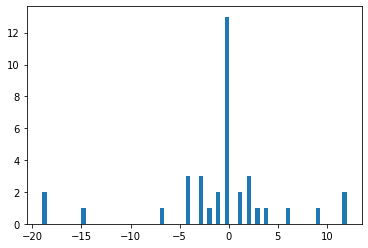

In [29]:
from sklearn import tree
evaluate_model(tree.DecisionTreeRegressor())    

train_score 0.8118651434757043
test_score 0.6591910369573071
mean_absolute_error 4.767711911376241
mean_squared_error 39.55923234569917
RMSE 6.289613052143921
median_absolute_error 3.775510204081627
mean_absolute_percentage_error 0.015196167848163073


AdaBoostRegressor(loss='square', n_estimators=300)

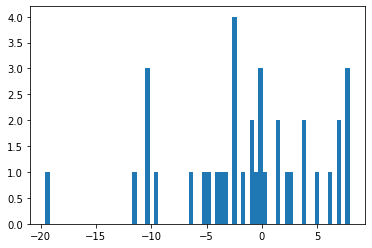

In [30]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor,RandomForestRegressor
evaluate_model(AdaBoostRegressor(n_estimators=300, loss="square"))    

In [31]:
predict(AdaBoostRegressor(n_estimators=300, loss="square"), 68, 357, 31.4,27)

array([330.])

train_score 0.8830575568220647
test_score 0.716293261835452
mean_absolute_error 3.966023835695457
mean_squared_error 32.93111974782735
RMSE 5.738564258403608
median_absolute_error 2.894920602088291
mean_absolute_percentage_error 0.012622907115668915


GradientBoostingRegressor(loss='lad', random_state=42)

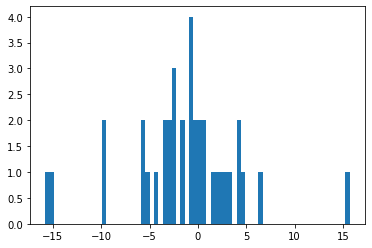

In [32]:
evaluate_model(GradientBoostingRegressor(
    loss="lad",
    n_estimators=100,
    random_state=42
))    

In [33]:
predict(GradientBoostingRegressor(
    loss="lad",
    n_estimators=100,
    random_state=42
), 68, 357, 31.4,27)

array([331.3062677])

train_score 0.9520710376329897
test_score 0.7443318315938354
mean_absolute_error 3.6394594594594616
mean_squared_error 29.67655658783783
RMSE 5.447619350490435
median_absolute_error 2.566250000000025
mean_absolute_percentage_error 0.011617058675692932


RandomForestRegressor(criterion='mae', n_estimators=400, random_state=42)

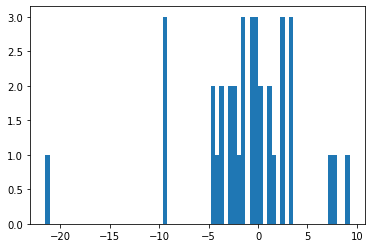

In [34]:
evaluate_model(RandomForestRegressor(
    n_estimators=400,
    criterion="mae",
    random_state=42))    

In [35]:
clf = RandomForestRegressor(
    n_estimators=400,
    criterion="mae",
    random_state=42).fit(X_train,y_train)
predict(RandomForestRegressor(
    n_estimators=400,
    criterion="mae",
    random_state=42), 68, 357, 31.4,27)

array([338.51])

train_score 0.7597835351784147
test_score 0.5763440616502316
mean_absolute_error 4.670828633282813
mean_squared_error 49.175654155886264
RMSE 7.0125355012211
median_absolute_error 2.699694471956434
mean_absolute_percentage_error 0.014786631742337769


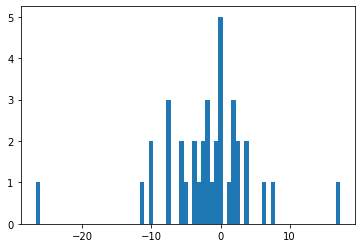

In [36]:
from sklearn.linear_model import LassoCV
las = evaluate_model(LassoCV()) 

In [37]:
las.coef_

array([ 8.743545  , -0.26599214,  0.80047579,  7.19537646])